In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

main_df = pd.read_csv('../data/raw/AB_NYC_2019.csv')
main_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Get Data Frame structure data
print(f"Shape:\n{main_df.shape}\n")
print(f"Info:\n{main_df.info()}")

Shape:
(48895, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review 

In [4]:
# Remove unnecesary columns
main_df = main_df.drop(columns=['host_id', 'host_name', 'calculated_host_listings_count'])
main_df.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,0


In [5]:
# Search empty data on columns
null_counts = main_df.isnull().sum()
print(null_counts)

id                         0
name                      16
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review            10052
reviews_per_month      10052
availability_365           0
dtype: int64


In [6]:
# Replace empty data
main_df['name'] = main_df['name'].fillna('No name')
main_df['reviews_per_month'] = main_df['reviews_per_month'].fillna(0)

null_counts = main_df.isnull().sum()
print(null_counts)

id                         0
name                       0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review            10052
reviews_per_month          0
availability_365           0
dtype: int64


En este caso, en la columna last_review no insertaremos 0 u otro tipo de valor en los nulos, ya que más adelante al convertir toda la columna a datetime resultará más robusto e interesante que esos valores sean NaT para poder tomarlos como fechas que no se han introducido y poder trabajar la columna como fechas.

In [7]:
# Get each column type and check if there are more than one type per column to unify them
column_types = main_df.dtypes

formatted_types = {
    column: column_types[column].name if column_types[column] != 'bool' else 'boolean' 
    for column in main_df.columns
}

def get_types_per_column(df_columns):
    for column in df_columns:
        column_types = main_df[column].apply(type).unique()
        if len(column_types) > 1:
            type_names = [t.__name__ for t in column_types]
            print(f'{column}: <{type_names}>')
        else:
            print(f'{column}: <{column_types[0].__name__}>')

get_types_per_column(main_df.columns)

id: <int>
name: <str>
neighbourhood_group: <str>
neighbourhood: <str>
latitude: <float>
longitude: <float>
room_type: <str>
price: <int>
minimum_nights: <int>
number_of_reviews: <int>
last_review: <['str', 'float']>
reviews_per_month: <float>
availability_365: <int>


In [8]:
# Clean data types
main_df['last_review'] = pd.to_datetime(main_df['last_review'], errors='coerce').dt.date

get_types_per_column(main_df.columns)

id: <int>
name: <str>
neighbourhood_group: <str>
neighbourhood: <str>
latitude: <float>
longitude: <float>
room_type: <str>
price: <int>
minimum_nights: <int>
number_of_reviews: <int>
last_review: <['date', 'NaTType']>
reviews_per_month: <float>
availability_365: <int>


A continuación, teniendo los tipos de los datos establecidos y los nulos limpios, procedemos a buscar duplicados para eliminarlos o procesarlos del modo que sea necesario.

In [9]:
# Get duplicate data
def get_duplicates(df, column):
    duplicated = df[df.duplicated(subset=[column], keep=False)]
    return duplicated.groupby(column).size().reset_index(name='count')

def get_duplicated_column_data(df, column, value):
    return df[df[column]] == value

# Check that there's no id or complete content duplicated
duplicated_content =  main_df.duplicated(subset=main_df.columns.difference(['id'])).any()
print(f'Duplicated content:\n{(duplicated_content)}\n')

duplicated_id = get_duplicates(main_df, 'id')
print(f'Duplicated id:\n{duplicated_id}')

Duplicated content:
False

Duplicated id:
Empty DataFrame
Columns: [id, count]
Index: []


No se encuentra ningún id duplicado ni fila que tenga todos sus datos duplicados. Sin embargo, hacemos una búsqueda de duplicados por nombre, ya que se ha podido registrar una misma estancia varias veces erróneamente, por lo que sus valores podrían ser diferentes siendo la misma.

In [10]:
# Check if there are duplicated names and in case, check whole content of these rows
duplicated_name = get_duplicates(main_df, 'name')
print(f'Duplicated name:\n{duplicated_name}\n')

duplicated_names_list = duplicated_name['name'].drop_duplicates().tolist()

if 'No name' in duplicated_names_list:
    duplicated_names_list.remove('No name')

print(f'Duplicated names list:\n{duplicated_names_list}\n')

Duplicated name:
                                                  name  count
0    *NO GUEST SERVICE FEE* Luxury Midtown One Bedr...      2
1                      1 BR Suite in Midtown Manhattan      2
2                                 1 BR UPPER EAST SIDE      2
3                            1 Bedroom in Williamsburg      2
4               1 bedroom apartment on Columbus Avenue      2
..                                                 ...    ...
641                       west village 1BR!best value!      2
642                 ★Premier Queen Room with Balcony ★      2
643                 ✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿      2
644               ❤ of Manhattan | Fantastic 1 Bedroom      4
645                        步行9分钟到法拉盛缅街中心的电梯房,提供免费矿泉水可乐      3

[646 rows x 2 columns]

Duplicated names list:
['*NO GUEST SERVICE FEE* Luxury Midtown One Bedroom Suite with Kitchen', '1 BR Suite in Midtown Manhattan', '1 BR UPPER EAST SIDE', '1 Bedroom in Williamsburg', '1 bedroom apartment on Columb

In [11]:
# Create dict with duplicated names data frames
duplicated_names_df_dict = {}

for name in duplicated_names_list:
    filtered_df = main_df[main_df['name'] == name]
    duplicated_names_df_dict[name] = filtered_df

print(duplicated_names_df_dict)
print(main_df.info)

{'*NO GUEST SERVICE FEE* Luxury Midtown One Bedroom Suite with Kitchen':              id                                               name  \
34347  27237604  *NO GUEST SERVICE FEE* Luxury Midtown One Bedr...   
34352  27237625  *NO GUEST SERVICE FEE* Luxury Midtown One Bedr...   

      neighbourhood_group neighbourhood  latitude  longitude        room_type  \
34347           Manhattan       Midtown  40.75294  -73.96731  Entire home/apt   
34352           Manhattan       Midtown  40.75459  -73.96707  Entire home/apt   

       price  minimum_nights  number_of_reviews last_review  \
34347    737               3                  2  2019-06-07   
34352    737               3                  3  2019-06-10   

       reviews_per_month  availability_365  
34347               0.40               235  
34352               0.44               153  , '1 BR Suite in Midtown Manhattan':              id                             name neighbourhood_group  \
42776  33216329  1 BR Suite in Midtown 

Como hay muchos casos en los que los datos con nombres duplicados tienen los mismos datos, por lo que se entiende que son estancias que se han registrado múltiples veces. Por ello se procede a analizar los diferentes datos para unificarlos en una sola entrada, obteniendo medias, sumas o tratando cada uno dependiendo del contexto.

In [12]:
# Unify duplicated names registeres and process data
def unify_duplicate_data(df):
    unified_data = {
        'id': df.iloc[0]['id'],
        'name': df.iloc[0]['name'],
        'neighbourhood_group': df.iloc[0]['neighbourhood_group'],
        'neighbourhood': df.iloc[0]['neighbourhood'],
        'latitude': df.iloc[0]['latitude'],
        'longitude': df.iloc[0]['longitude'],
        'room_type': df.iloc[0]['room_type'],
        'price': df['price'].mean(skipna=True),
        'minimum_nights': df['minimum_nights'].mean(skipna=True),
        'number_of_reviews': df['number_of_reviews'].sum(skipna=True),
        'last_review': df['last_review'].dropna().max(),
        'reviews_per_month': df['reviews_per_month'].mean(skipna=True),
        'availability_365': df['availability_365'].mean(skipna=True)
    }
    
    return unified_data

unified_names_df_dict = {}

for name in duplicated_names_list:
    df = duplicated_names_df_dict[name]
    unified_data = unify_duplicate_data(df)
    unified_names_df_dict[name] = unified_data

print(unified_names_df_dict)

{'*NO GUEST SERVICE FEE* Luxury Midtown One Bedroom Suite with Kitchen': {'id': np.int64(27237604), 'name': '*NO GUEST SERVICE FEE* Luxury Midtown One Bedroom Suite with Kitchen', 'neighbourhood_group': 'Manhattan', 'neighbourhood': 'Midtown', 'latitude': np.float64(40.75294), 'longitude': np.float64(-73.96731), 'room_type': 'Entire home/apt', 'price': np.float64(737.0), 'minimum_nights': np.float64(3.0), 'number_of_reviews': np.int64(5), 'last_review': datetime.date(2019, 6, 10), 'reviews_per_month': np.float64(0.42000000000000004), 'availability_365': np.float64(194.0)}, '1 BR Suite in Midtown Manhattan': {'id': np.int64(33216329), 'name': '1 BR Suite in Midtown Manhattan', 'neighbourhood_group': 'Manhattan', 'neighbourhood': 'Midtown', 'latitude': np.float64(40.76453), 'longitude': np.float64(-73.98035), 'room_type': 'Private room', 'price': np.float64(250.0), 'minimum_nights': np.float64(1.0), 'number_of_reviews': np.int64(0), 'last_review': nan, 'reviews_per_month': np.float64(0.0

In [13]:
print(f'Main df shape before clean duplicated names: {main_df.shape}\n')

main_df = main_df[~main_df['name'].isin(duplicated_names_list)]
print(f'Main df shape after clean duplicated names: {main_df.shape}\n')

new_records_df = pd.DataFrame.from_dict(unified_names_df_dict, orient='index')
main_df = pd.concat([main_df, new_records_df], ignore_index=True)
print(f'Main df shape after add processed duplicated names: {main_df.shape}\n')


Main df shape before clean duplicated names: (48895, 13)

Main df shape after clean duplicated names: (47276, 13)

Main df shape after add processed duplicated names: (47921, 13)



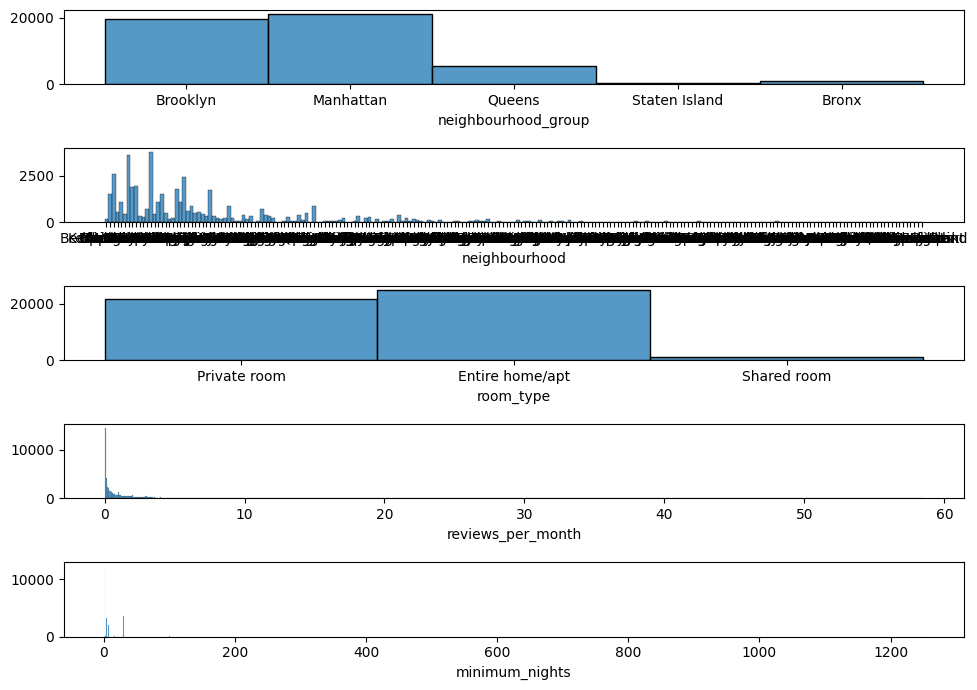

1250.0


In [18]:
# Univariate analysis
fig, axis = plt.subplots(5, figsize = (10, 7))

sns.histplot(ax = axis[0], data = main_df, x = 'neighbourhood_group').set(ylabel = None)
sns.histplot(ax = axis[1], data = main_df, x = 'neighbourhood').set(ylabel = None)
sns.histplot(ax = axis[2], data = main_df, x = 'room_type').set(ylabel = None)
sns.histplot(ax = axis[3], data = main_df, x = 'reviews_per_month').set(ylabel = None)
sns.histplot(ax = axis[4], data = main_df, x = 'minimum_nights').set(ylabel = None)

plt.tight_layout()
plt.show()

print(main_df['minimum_nights'].max())

In [17]:
main_df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,4.792100e+04,47921.000000,47921.000000,47921.000000,47921.000000,47921.000000,47921.000000,47921.000000
mean,1.893619e+07,40.729003,-73.952212,153.120506,7.002643,23.747522,1.097474,112.596583
std,1.099841e+07,0.054513,0.046086,241.695002,20.386631,45.197601,1.599080,131.149340
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,0.000000
25%,9.391541e+06,40.690040,-73.983100,69.000000,1.000000,1.000000,0.040000,0.000000
50%,1.955416e+07,40.723100,-73.955690,107.500000,3.000000,5.000000,0.380000,46.000000
75%,2.909598e+07,40.763150,-73.936200,175.000000,5.000000,24.000000,1.600000,225.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,666.000000,58.500000,365.000000


Tras observar el análisis descriptivo podemos ver algunos valores atípicos:
- En minimum_nights parece haber un claro outlier con su valor máximo.
- En reviews_per_month, si contemplamos una reseña por inquilino, encontramos su máximo como un valor atípico, ya que es improbable tener 58 reseñas mensuales teniendo en cuenta que en la mayoría de los casos se pide mínimo una noche por estancia.